<h1 align="center">Scientific Programming in Python</h1>
<h2 align="center">Topic 7: Basics of Data Visualization  </h2> 


_Notebook created by Martín Villanueva - `martin.villanueva@usm.cl` - DI UTFSM - May 2017._

In [32]:
import numba
import numexpr as ne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, fixed
%matplotlib inline

En la presente actividad simularemos y visualizaremos un sistema dinámico 2-dimensional simple. Para ello resolveromos una EDO numéricamente, utilizando el _método de Euler_. 

Consideremos un sistema de $N$ partículas $(x_i(t), y_i(t))$ en el dominio $[0,1]\times[0,1]$, cuyo movimiento se rige por las siguientes ecuaciones (EDOs autónomas):

\begin{align}
\frac{dx}{dt} &= \text{tanh}(x^2+y^2), \text{ con } x(0)=x_0, \\
\frac{dy}{dt} &= \text{tanh}(x^2+y^2), \text{ con } y(0)=y_0 \\
\end{align}

El _método de Euler_ para resolver este problema numéricamente, consiste en realizar la siguiente aproximación para la derivada:

\begin{align}
\frac{x_{i+1}-x_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow x_{i+1} = x_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2) \\
\frac{y_{i+1}-y_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow y_{i+1} = y_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2)
\end{align}

ocupando las condiciones iniciales $x_0$ e $y_0$ como puntos de partida. Aquí $\Delta t$ (_time step_) es un parámetro definido por usted, y usualmente toma valores pequeños.

__Notar__ que esta ecuación es válida para una partícula, y por tanto para simular un sistema de $N$ de estas, es necesario realizar esta actualización para cada partícula $(x_i,y_i)$ con $i \in [1,N]$.

__Se solicita que realice lo siguiente__:
1. Genere un conjunto de `100` puntos aleatoriamente distribuidos en el espacio $[0,1]\times[0,1]$ (Seran usados como posiciones iniciales del sistema). Grafíque el conjunto de puntos obtenidos.
2. Realizar un gráfico de la función que define el comportamiento del sistema: $f(z) = \text{tanh}(z^2)$ (gráfico unidimensional).
3. Desarrollar la función `simular(x0, y0, dt, tf)` que reciba los `np.ndarray` con las coordenadas iniciales `x0` e `y0` del sistema, el _time step_ `dt` (seleccione un valor pequeño $\sim 0.01$) y el tiempo final de simulación. Esta función debe graficar el conjunto de puntos del sistema, en su tiempo final.
4. Usando `interact` desarrolle un _widget_ para visualizar interactivamente distintos estados finales del sistema (distintos `tf`).

### Pregunta 1

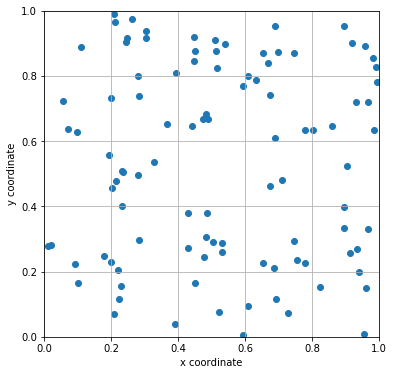

In [21]:
X = np.random.random(100)
Y = np.random.random(100)

plt.figure(figsize=(6,6))
plt.scatter(X, Y, marker='o')
plt.grid()
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### Parte 2


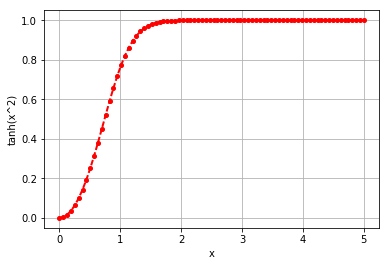

In [52]:
x = np.linspace(0.,5.,80)
y = np.tanh(np.power(x,2))
plt.plot(x, y, 'o--', lw=2, color='red', ms=4)
plt.xlabel("x")
plt.ylabel("tanh(x^2)")
plt.grid()
plt.show()

### Parte 3

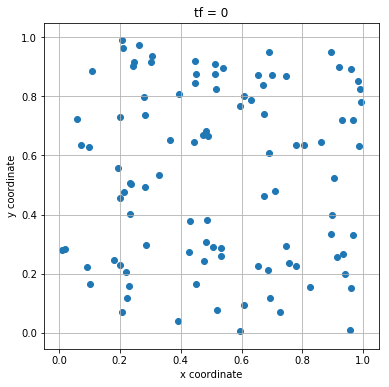

In [63]:
def simular(x0, y0, dt, tf):
    tf0 = tf
    while tf0 > 0:
        x1 = ne.evaluate("x0 + dt*tanh(x0**2 + y0**2)")
        y1 = ne.evaluate("y0 + dt*tanh(x0**2 + y0**2)")
        x0 = x1
        y0 = y1
        tf0 -= 1
    plt.figure(figsize=(6,6))
    plt.scatter(x0, y0,marker='o')
    plt.grid()
    plt.title('tf = %d' % tf)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    plt.show()
simular(X,Y,0.01,0)

### Parte 4

In [56]:
interact(simular,x0=fixed(X),y0=fixed(Y),dt=fixed(0.01),tf=(0,500,1))

/home/azuka/anaconda3/envs/science/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function __main__.simular>